# Main

In [1]:
from utils import *
import json

In [2]:
alpha = 0.05
T_burnin = 120
lr = 0.01
Csat = 2.5
KI = 1.0
ahead = 1
seasonal_period = 7
n_series=3
n_points=365*2

In [3]:
df = generar_datos(n_series=n_series, n_points=n_points, seed=123, start_date="2023-01-01")
df = assign_data_sets(df, date_col="FECHA", future_col="FUTURE", calib_ratio=0.4)


In [4]:
df_pdi, logs = apply_pdi_with_calibration_with_diagnostics(
    df=df,
    key_col="KEY",
    date_col="FECHA",
    value_col="Y",
    pred_col="YHATFIN",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    alpha=alpha,
    lr=lr,
    T_burnin=T_burnin,
    Csat=Csat,
    KI=KI,
    ahead=ahead,
    seasonal_period=seasonal_period,
    set_col="SET",
    lr_option="iqr"
)

100%|██████████| 3/3 [00:02<00:00,  1.07it/s]


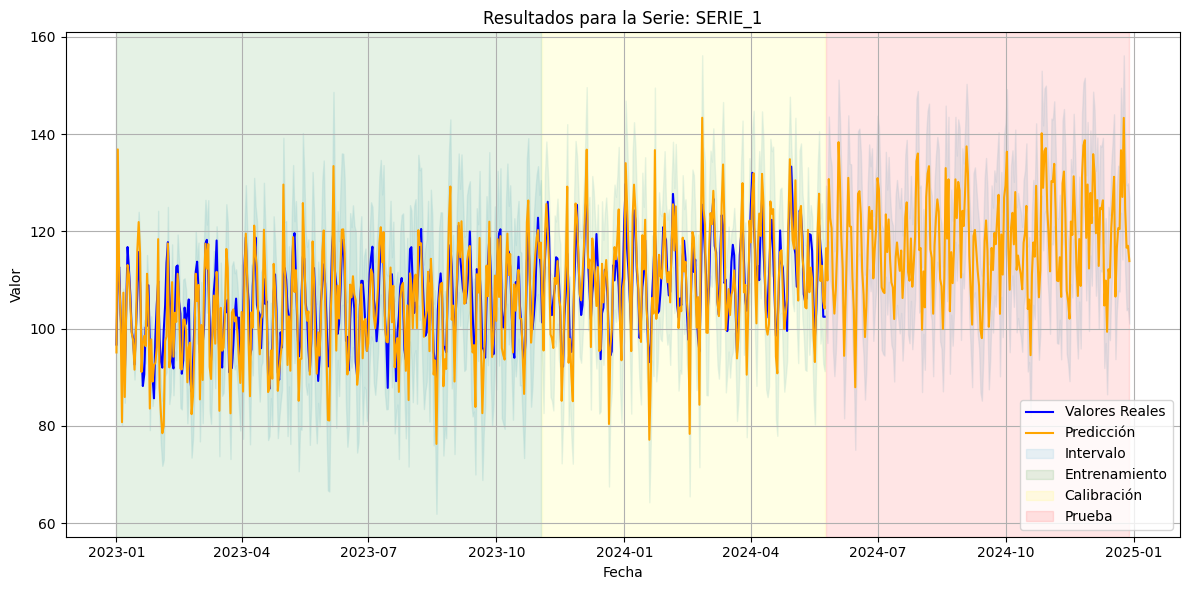

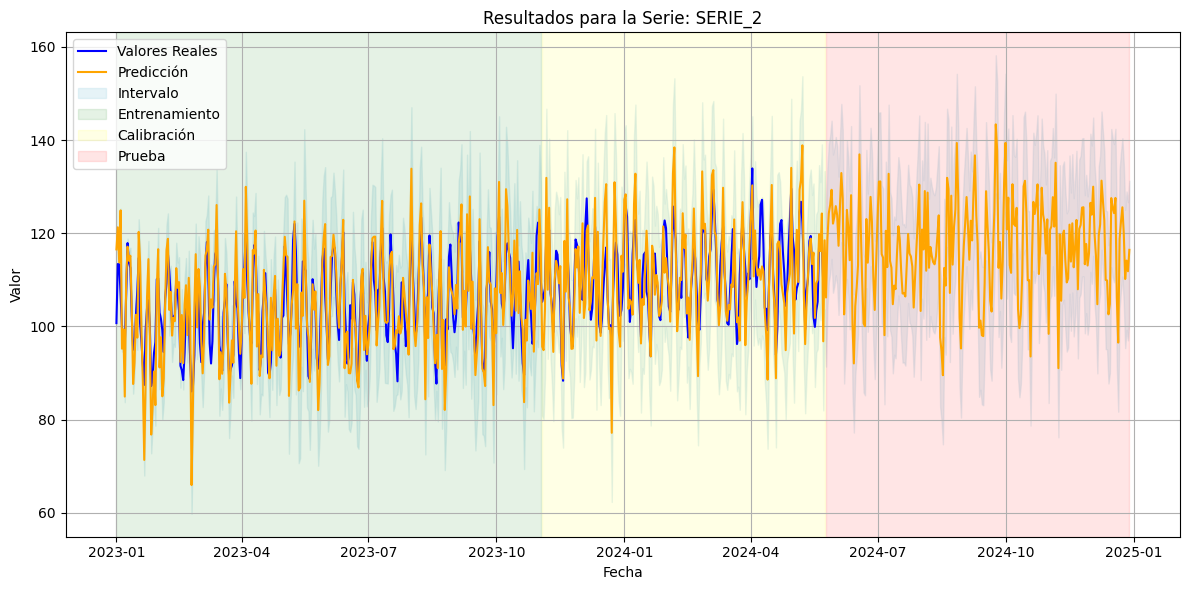

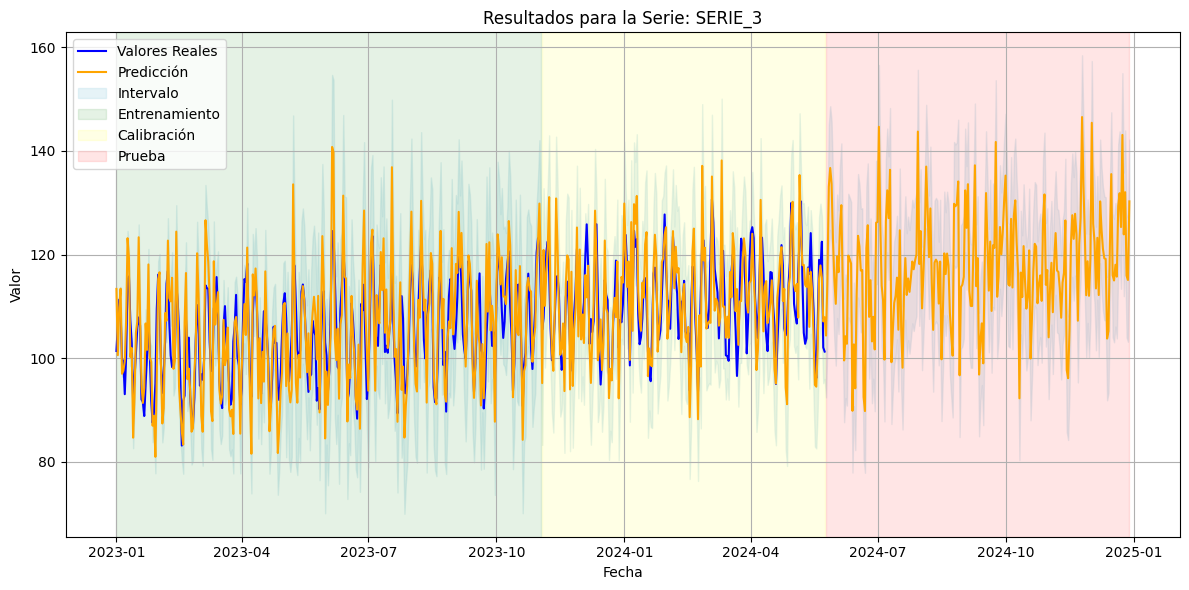

In [5]:
# Bucle para visualizar resultados para todas las series
for i in range(1, n_series + 1):
    key = f"SERIE_{i}"
    plot_series_results_with_sets(df_pdi, key=key)

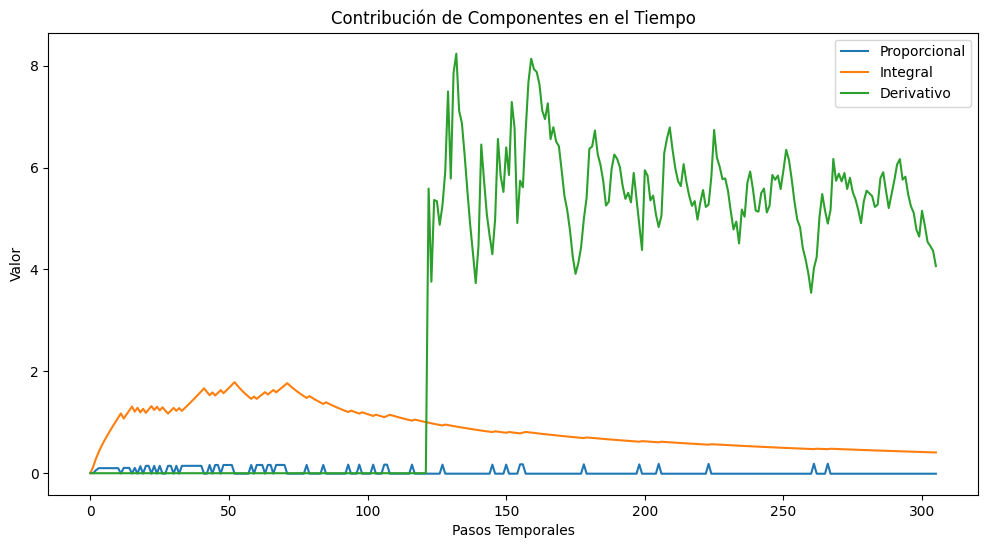

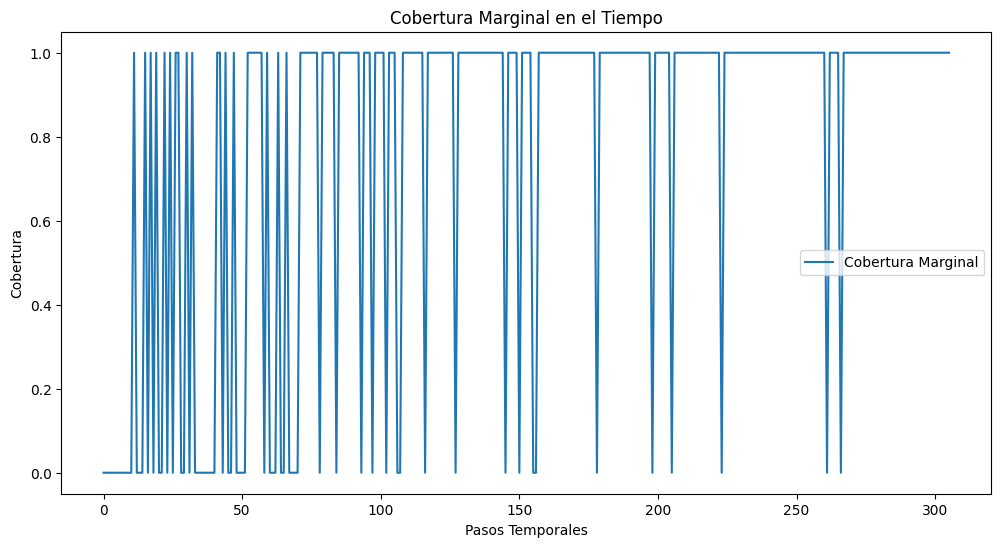

In [6]:
plot_logs(logs)

In [7]:
# Dividir el DataFrame en TRAIN, CALIBRATION y TEST
train_df = df_pdi[df_pdi["SET"] == "TRAIN"]
calib_df = df_pdi[df_pdi["SET"] == "CALIBRATION"]
test_df = df_pdi[df_pdi["SET"] == "TEST"]

# Calcular métricas por serie (KEY) para el conjunto de calibración
calib_metrics_by_key = calculate_metrics(
    calib_df,
    value_col="Y",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    alpha=alpha,
    condition_col="KEY"
)

# Mostrar resultados
print("Métricas por KEY (Calibración):")
print(calib_metrics_by_key)


Métricas por KEY (Calibración):
     Group  Marginal Coverage  Coverage Deviation  Average Region Size  \
0  SERIE_1           0.931373           -0.018627            25.699279   
1  SERIE_2           0.946078           -0.003922            29.674335   
2  SERIE_3           0.897059           -0.052941            23.834551   

   Winkler Score  
0      32.611585  
1      34.180287  
2      32.609469  
